# Fair Division of Indivisible Goods

This is a Jupyter Notebook coming along with the chapter 
* Chapter 12 (Handbook of Computational Social Choice)

This notebook was used as part of the course of :
* The COST Summer School Lecture on Fair Division of Indivisible Items (San Sebastian, July 2016)
* COCOMA: Master ANDROIDE course at Sorbonne Université, 2016-2022

This version: 10-01-2022

## 1. Defining MARA problems

By importing the module `problem`, we can define fair division problems, by specifying a number of agents, a number of resources, and a type of "culture" to draw the preferences from. 

You can either:
* define a **centralized** MARA problem (all the resources are initially held by agent 0, who plays in this case the role of the auctioneer -- and counts as an agent)
* define a **decentralized** MARA problem (resources are initially randomly allocated)

You can also select the method to generate utilities: 
* **uniform**: utilities for each resource is drawn uniformly at random from 1 to 100
* **normalized**: utilities are normalized in [0,1]
* **Borda** utilities (worst resource valued 1, and so on, best one m)
* **empty**: leaves utilites undefined. You can later use p.setUtilities() to set utilities as you wish for a problem p. 

In [2]:
from problem import Problem


In [3]:
p1 = Problem(3,4,'borda',centralized=True)
print(p1)

agent 1{'r0': 1, 'r1': 3, 'r2': 2, 'r3': 4}
agent 2{'r0': 2, 'r1': 1, 'r2': 3, 'r3': 4}



Printing the allocation allows to see which agent holds which resource, and the current utility of each agent. 

In [4]:
print(p1.printAllocation())


auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0



It is also possible to set the allocation by hand, by using the setAllocation method. The allocation is specified as a boolean array. 

In [5]:
p1.setAllocation([[0,0,0,0],[1,1,0,0],[0,0,1,1]])

In [6]:
print(p1.printAllocation())

auctioneer                                  []	
agent  1                       ['r0', 'r1']	 4
agent  2                       ['r2', 'r3']	 7



A problem also handles an (undirected) **visibility graph** among agents. Note that in the centalized case, agent 0 is isolated from the rest (his utility is irrelevant), while all the other agents are by default connected. 

In [7]:
print (p1.visibility_graph)

{0: [], 1: [2], 2: [1]}


In [8]:
p1.setVisibilityGraph({0:[],1:[],2:[]})

No one sees anyone now...

### Example of the course

In [9]:
p3 = Problem(4,6,'empty', centralized=True)
p3.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print (p3)
print (p3.printAllocation())

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



## 2. Fairness measures

The module `fairness_measures` provides a number of fairness measures for a given allocation: 
* proportionality
* egalitarian social welfare
* various notions of envy

In [10]:
import fairness_measures

In [11]:
p2 = Problem(3,6,'normalized',centralized=False)
print(p2)

agent 0{'r0': 0.164, 'r1': 0.167, 'r2': 0.259, 'r3': 0.167, 'r4': 0.05, 'r5': 0.193}
agent 1{'r0': 0.235, 'r1': 0.191, 'r2': 0.026, 'r3': 0.262, 'r4': 0.103, 'r5': 0.182}
agent 2{'r0': 0.022, 'r1': 0.178, 'r2': 0.062, 'r3': 0.231, 'r4': 0.213, 'r5': 0.293}



In [12]:
print(p2.printAllocation())

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                 ['r2', 'r4', 'r5']	0.502
agent  1                       ['r0', 'r1']	0.426
agent  2                             ['r3']	0.231



We can check various fairness properties...

In [13]:
print(fairness_measures.isProportional(p2))

False


In [14]:
print(fairness_measures.egalitarianSW(p2))

0.231


... and build the envy matrix from which several measures can be obtained. 

In [15]:
em2 = fairness_measures.envyMatrix(p2)
print(em2)
print("There are ", fairness_measures.nbEnviousAgents(em2), " envious agents")
print("The maximum envy among two agents is ", fairness_measures.maxEnvy(em2))

[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.337 0.    0.   ]]
There are  1  envious agents
The maximum envy among two agents is  0.3370000000000001


In [16]:
print(fairness_measures.isEnvyFree(em2))

False


In [17]:
em1 = fairness_measures.envyMatrix(p1)
print(fairness_measures.isEnvyFree(em1))

True


In [18]:
p1.setVisibilityGraph({0:[],1:[2],2:[1]})
em1 = fairness_measures.envyMatrix(p1)
print(fairness_measures.isEnvyFree(em1))

False


### Question 1

Create an instance involving 3 agents and 4 resources, with the following  utilities for the ressources : 
* agent 0: 6, 6, 1, 7
* agent 1: 1, 3, 9, 7
* agent 2: 8, 0, 4, 8

Find allocations which satisfies : 
* proportionality
* envy-freeness
* maximizes egalitarian social welfare
* maximizes utilitarian social welfare
* maximizes the Nash product

In [19]:
# Instance :
pQ1 = Problem(4,4,'empty', centralized=True)
pQ1.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0},\
{'r0':6,'r1':6,'r2':1,'r3':7},\
{'r0':1,'r1':3,'r2':9,'r3':7},\
{'r0':8,'r1':0,'r2':4,'r3':8}]
)
print(pQ1)
print(pQ1.printAllocation())

agent 1{'r0': 6, 'r1': 6, 'r2': 1, 'r3': 7}
agent 2{'r0': 1, 'r1': 3, 'r2': 9, 'r3': 7}
agent 3{'r0': 8, 'r1': 0, 'r2': 4, 'r3': 8}

auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



In [20]:
print("proportionality :")
print(fairness_measures.proportionality(pQ1))
pQ1.setAllocation([[0,0,0,0],[0,0,0,1],[0,0,1,0],[1,1,0,0]])
print(pQ1.printAllocation())
print(fairness_measures.isProportional(pQ1))

print("")
print("envy-freeness :")
pQ1.setAllocation([[0,0,0,0],[0,0,0,1],[0,1,1,0],[1,0,0,0]])
emQ1 = fairness_measures.envyMatrix(pQ1)
print(emQ1)
print("There are ", fairness_measures.nbEnviousAgents(emQ1), " envious agents")
print("The maximum envy among two agents is ", fairness_measures.maxEnvy(emQ1))
print(pQ1.printAllocation())
print(fairness_measures.isEnvyFree(emQ1))

print("")
print("maximizes egalitarian social welfare :")
# maximizes egalitarian social welfare
pQ1.setAllocation([[0,0,0,0],[0,1,0,1],[0,0,1,0],[1,0,0,0]])
print(pQ1.printAllocation())
print(fairness_measures.egalitarianSW(pQ1))

print("")
print("maximizes utilitarian social welfare :")
# maximizes utilitarian social welfare
pQ1.setAllocation([[0,0,0,0],[0,1,0,0],[0,0,1,0],[1,0,0,1]])
print(pQ1.printAllocation())

print("")
print("maximizes the Nash product :")
# maximizes the Nash product
pQ1.setAllocation([[0,0,0,0],[0,1,0,0],[0,0,1,0],[1,0,0,1]])
print(pQ1.printAllocation())

proportionality :
[0.0, 6.666666666666667, 6.666666666666667, 6.666666666666667]
auctioneer                                  []	
agent  1                             ['r3']	 7
agent  2                             ['r2']	 9
agent  3                       ['r0', 'r1']	 8

True

envy-freeness :
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
There are  0  envious agents
The maximum envy among two agents is  0.0
auctioneer                                  []	
agent  1                             ['r3']	 7
agent  2                       ['r1', 'r2']	12
agent  3                             ['r0']	 8

True

maximizes egalitarian social welfare :
auctioneer                                  []	
agent  1                       ['r1', 'r3']	13
agent  2                             ['r2']	 9
agent  3                             ['r0']	 8

8

maximizes utilitarian social welfare :
auctioneer                                  []	
agent  1                             ['r1']	 6
agent  2     

### Question 2

There are a few missing notions though. Code functions which returns:
* whether the allocation is envy-free up to **one** or **any** good
* wether the allocation is proportional up to **one** or **any** good
Test whether you can find a counter-example to the fact that EFX does not imply PROPX. 

Another missing notion is Competitive Equilibrium with equal income. Code functions which: 
* for a problem, given an allocation and a price vector, returns whether this allocation is CEEI
* for a problem, given a price vector, checks whether there exists an allocation in CEEI
* for a a problem, checks whether there exists a pair of price vector and allocation in CEEI

In [104]:
# EF

def envious(m,i):
    '''
    @m: an envy matrix
    @i: an agent
    returns whether an agent is envious
    '''
    (n,n) = m.shape
    return sum([m[i][j] for j in range(n)])!=0

def envious_i_j(m,i,j):
    return m[i][j] !=0

def envy_free_up_to_one_good(p):
    '''
    returns whether envy-free up to one or any good
    '''
    # si envy_free tout court
    em = fairness_measures.envyMatrix(p)
    #print(em)
    if fairness_measures.isEnvyFree(em):
        print("Déjà envy-free !")
        return True
    
    # les agents envieux et les agents enviés sont :
    envious_agents = []
    envied_agents = []
    if p.centralized:
        deb=1
    for i in range(deb,p.n):
        if fairness_measures.envied(em,i):
            envied_agents.append(i)
        if envious(em,i):    
            envious_agents.append(i)
    '''print("Les agents envieux sont :",envious_agents)
    print("Les agents enviés sont :",envied_agents)'''

    # on va checker pour chaque agent envieux
    for envious_agent in envious_agents:
        # les agents enviés
        for envied_agent in envied_agents:
            if envious_agent != envied_agent:
                resources = p.agent[envied_agent].hold.copy()
                #print("Les ressources de l'agent envié",envied_agent,"par l'agent envieux",envious_agent,"sont :",resources)
                for r in resources:
                    #print(r)
                    p.agent[envied_agent].giveItem(r)
                    em_env = fairness_measures.envyMatrix(p)
                    #print(em_env)
                    p.agent[envied_agent].getItem(r)
                    # si l'agent est toujours envieux

                    if not envious(em_env,envious_agent): # EF1
                        break
                    else:
                        if r == resources[-1]:
                            return False
                
    return True

def envy_free_up_to_any_good(p):
    '''
    returns whether envy-free up to one or any good
    '''
    # si envy_free tout court
    em = fairness_measures.envyMatrix(p)
    #print(em)
    if fairness_measures.isEnvyFree(em):
        print("Déjà envy-free !")
        return True
    
    # les agents envieux et les agents enviés sont :
    envious_agents = []
    envied_agents = []
    if p.centralized:
        deb=1
    for i in range(deb,p.n):
        if fairness_measures.envied(em,i):
            envied_agents.append(i)
        if envious(em,i):    
            envious_agents.append(i)
    print("Les agents envieux sont :",envious_agents)
    print("Les agents enviés sont :",envied_agents)

    # on va checker pour chaque agent envieux
    for envious_agent in envious_agents:
        # les agents enviés
        for envied_agent in envied_agents:
            if envious_agent != envied_agent:
                resources = p.agent[envied_agent].hold.copy()
                print("Les ressources de l'agent envié",envied_agent,"par l'agent envieux",envious_agent,"sont :",resources)
                for r in resources:
                    #print(r)
                    p.agent[envied_agent].giveItem(r)
                    em_env = fairness_measures.envyMatrix(p)
                    #print(em_env)
                    p.agent[envied_agent].getItem(r)
                    # si l'agent est toujours envieux
                    #if envious(em_env,envious_agent): # EFX
                    if envious_i_j(em_env,envious_agent,envied_agent):
                        print(r)
                        print(em_env)
                        return False
                
    return True

# Instance :
pQ1 = Problem(4,4,'empty', centralized=True)
pQ1.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0},\
{'r0':6,'r1':6,'r2':1,'r3':7},\
{'r0':1,'r1':3,'r2':9,'r3':7},\
{'r0':8,'r1':0,'r2':4,'r3':8}]
)
print(pQ1)
print(pQ1.printAllocation())

pQ1.setAllocation([[0,0,0,0],[0,0,0,1],[0,0,1,0],[1,1,0,0]])
print(pQ1.printAllocation())
print("")
print(envy_free_up_to_one_good(pQ1))
print(envy_free_up_to_any_good(pQ1))

def getAllocation(p):
    allocation = []
    for i in range(len(p.agent)):
        allocation.append([0]*p.m)
        for j in range(len(p.agent[i].hold)):
            allocation[i][int(p.agent[i].hold[j][-1])] = 1
    return allocation

print(getAllocation(pQ1))

agent 1{'r0': 6, 'r1': 6, 'r2': 1, 'r3': 7}
agent 2{'r0': 1, 'r1': 3, 'r2': 9, 'r3': 7}
agent 3{'r0': 8, 'r1': 0, 'r2': 4, 'r3': 8}

auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

auctioneer                                  []	
agent  1                             ['r3']	 7
agent  2                             ['r2']	 9
agent  3                       ['r0', 'r1']	 8


True
Les agents envieux sont : [1]
Les agents enviés sont : [3]
Les ressources de l'agent envié 3 par l'agent envieux 1 sont : ['r1', 'r0']
True
[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 0]]


In [96]:
# PROP

def proportional_up_to_one(p):
    
    pfs = fairness_measures.proportionality(p)
    print("pfs :",pfs)
    
    if fairness_measures.isProportional(p):
        return True

    deb=0
    if p.centralized:
        deb=1
    for i in range(deb,p.n):
        if p.agent[i].current_u<pfs[i]:
            resources = list(set(p.resources) - set(p.agent[i].hold))
            for r in resources:
                p.agent[i].getItem(r)
                if p.agent[i].current_u>=pfs[i]:
                    break
                else:
                    if r == resources[-1]: # si toujours < pfs et donc non prop
                        p.agent[i].giveItem(r)
                        return False                    
                p.agent[i].giveItem(r)
    return True

def proportional_up_to_any_good(p): # ok mais on peut améliorer la complexité avec le "up to the least valued good"
    
    pfs = fairness_measures.proportionality(p)
    print("pfs :",pfs)
    
    if fairness_measures.isProportional(p):
        return True

    deb=0
    if p.centralized:
        deb=1
    for i in range(deb,p.n):
        if p.agent[i].current_u<pfs[i]:
            resources = list(set(p.resources) - set(p.agent[i].hold))
            for r in resources:
                p.agent[i].getItem(r)
                if p.agent[i].current_u<pfs[i]:
                    p.agent[i].giveItem(r)
                    return False
                p.agent[i].giveItem(r)
    return True
            
# Instance :
pQ1 = Problem(4,4,'empty', centralized=True)
pQ1.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0},\
{'r0':6,'r1':6,'r2':1,'r3':7},\
{'r0':1,'r1':3,'r2':9,'r3':7},\
{'r0':8,'r1':0,'r2':4,'r3':8}]
)
print(pQ1)
print(pQ1.printAllocation())

pQ1.setAllocation([[0,0,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0]])
print(pQ1.printAllocation())
print(fairness_measures.isProportional(pQ1))
print("")
print(proportional_up_to_one(pQ1))
print(proportional_up_to_any_good(pQ1))

agent 1{'r0': 6, 'r1': 6, 'r2': 1, 'r3': 7}
agent 2{'r0': 1, 'r1': 3, 'r2': 9, 'r3': 7}
agent 3{'r0': 8, 'r1': 0, 'r2': 4, 'r3': 8}

auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

auctioneer                                  []	
agent  1                             ['r2']	 1
agent  2                             ['r3']	 7
agent  3                       ['r0', 'r1']	 8

False

pfs : [0.0, 6.666666666666667, 6.666666666666667, 6.666666666666667]
True
pfs : [0.0, 6.666666666666667, 6.666666666666667, 6.666666666666667]
True


In [106]:
# Instance EFX but not PROPX :
pQ2_EFX_notPROPX = Problem(6,5,'empty', centralized=True)
pQ2_EFX_notPROPX.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0},\
{'r0':1,'r1':1,'r2':1,'r3':1,'r4':1},\
{'r0':1,'r1':1,'r2':1,'r3':1,'r4':1},\
{'r0':1,'r1':1,'r2':1,'r3':1,'r4':1},\
{'r0':1,'r1':1,'r2':1,'r3':1,'r4':1},\
{'r0':3,'r1':6,'r2':4,'r3':1,'r4':2}]
)
pQ2_EFX_notPROPX.setAllocation([[0,0,0,0,0],[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
print(pQ2_EFX_notPROPX.printAllocation())
#print(envy_free_up_to_one_good(pQ2_EFX_notPROPX))
print(envy_free_up_to_any_good(pQ2_EFX_notPROPX))
#print(proportional_up_to_one(pQ2_EFX_notPROPX))
print(proportional_up_to_any_good(pQ2_EFX_notPROPX))

auctioneer                                  []	
agent  1                             ['r0']	 1
agent  2                             ['r1']	 1
agent  3                             ['r2']	 1
agent  4                             ['r3']	 1
agent  5                             ['r4']	 2

Les agents envieux sont : [5]
Les agents enviés sont : [1, 2, 3]
Les ressources de l'agent envié 1 par l'agent envieux 5 sont : ['r0']
Les ressources de l'agent envié 2 par l'agent envieux 5 sont : ['r1']
Les ressources de l'agent envié 3 par l'agent envieux 5 sont : ['r2']
True
pfs : [0.0, 1.0, 1.0, 1.0, 1.0, 3.2]
False


In [64]:
# A naive recursive implementation of 0-1 Knapsack Problem
  
# Returns the maximum value that can be put in a knapsack of
# capacity W
def knapSack(W, wt, val, n):
  
    # Base Case
    if n == 0 or W == 0 :
        return 0
  
    # If weight of the nth item is more than Knapsack of capacity
    # W, then this item cannot be included in the optimal solution
    if (wt[n-1] > W):
        return knapSack(W, wt, val, n-1)
  
    # return the maximum of two cases:
    # (1) nth item included
    # (2) not included
    else:
        return max(val[n-1] + knapSack(W-wt[n-1], wt, val, n-1),
                   knapSack(W, wt, val, n-1))
    
# end of function knapSack
  
# To test above function
val = [6, 6, 6, 0, 0]
wt = [0.4, 0.5, 0.5, 0.3, 0.3]
W = 1
n = len(val)
print(knapSack(W, wt, val, n))
  
# This code is contributed by Nikhil Kumar Singh

12


In [77]:
def knapSack_path(W, wt, val, n):
 
    # Base Case
    if n == 0 or W == 0:
        return 0, []
 
    # If weight of the nth item is
    # more than Knapsack of capacity W,
    # then this item cannot be included
    # in the optimal solution
    if (wt[n-1] > W):
        return knapSack_path(W, wt, val, n-1)
 
    # return the maximum of two cases:
    # (1) nth item included
    v1, p1 = knapSack_path(W-wt[n-1], wt, val, n-1)
    v1 += val[n-1]
    p1 = p1 + [n-1]
    #p1 = p1 + ["r"+str(n-1)]
    
    # (2) not included
    v2, p2 = knapSack_path(W, wt, val, n-1)
    
    return (v1, p1) if v1 >= v2 else (v2, p2)
    
val = [6, 6, 6, 0, 0]
wt = [0.4, 0.5, 0.5, 0.3, 0.3]
#val = [6, 6, 0, 0]
#wt = [0.4, 0.5, 0.3, 0.3]
W = 1
n = len(val)
val, path = knapSack_path(W, wt, val, n)
print(val, path)

def all_optimal_solutions_knapsack(W, wt, val, n):
    val,path = knapSack_path(W, wt, val, n)
    for i in range(len(path)):
        path_bis = path.copy()

            del a[-1]
    pass

12 [1, 2]


In [74]:
# CEEI

#for a problem, given an allocation and a price vector, returns whether this allocation is CEEI
#for a problem, given a price vector, checks whether there exists an allocation in CEEI
#for a a problem, checks whether there exists a pair of price vector and allocation in CEEI

# problème du sac-à-dos sans le path
def isCEEI(p,wallet,allocation,price_vector):
    p.setAllocation(allocation)
    print(p.printAllocation())
    deb=0
    if p.centralized:
        deb=1
    for i in range(deb,p.n):
        utilities = list(p.agent[i].u.values())
        optimal = knapSack(wallet,price_vector,utilities,len(utilities))
        if p.agent[i].current_u!=optimal:
            print("Not CEEI because of agent",i)
            return False
    return True

# problème du sac-à-dos avec le path
def existsCEEI(p,wallet,price_vector):
    # 1) application du problème du sac-à-dos (avec le path) sur un agent
    # 2) idem sur les autres agents tout en respectant les objets pris par les agents précédents
    # 3) isCEEI
    # 4) si False, réapplication du problème du sac-à-dos mais avec un autre path
    # 5) boucler.
    # ou
    # 1) toutes les combinaisons d'allocations possibles (tout en respectant le vecteur prix)
    # 2) isCEEI
    # ou
    # 1) pour chaque agent, j'applique knapsack (avec ou sans le path)
    # 2) check si les fusions des solutions du knapsack sont possibles (une ressource ne peut pas être prise par plusieurs agents à la fois)
    # la méthode choisie est la
    
    
    pass

# Instance :
pQ1 = Problem(4,4,'empty', centralized=True)
pQ1.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0},\
{'r0':6,'r1':6,'r2':1,'r3':7},\
{'r0':1,'r1':3,'r2':9,'r3':7},\
{'r0':8,'r1':0,'r2':4,'r3':8}]
)
print(pQ1)
print(pQ1.printAllocation())

p = pQ1
allocation = [[0,0,0,0],[0,0,0,1],[0,0,1,0],[1,1,0,0]]
wallet = 1
price_vector = [0.4, 0.5, 0.5, 0.3, 0.3]

print(isCEEI(p,wallet,allocation,price_vector))

print("")

# Instance :
p_cours = Problem(3,5,'empty', centralized=True)
p_cours.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0},\
{'r0':6,'r1':6,'r2':6,'r3':0,'r4':0},\
{'r0':5,'r1':5,'r2':3,'r3':3,'r4':2}]
)
print(p_cours)
print(p_cours.printAllocation())

p = p_cours
allocation = [[0,0,0,0,0],[0,1,1,0,0],[1,0,0,1,1]]
wallet = 1
price_vector = [0.4, 0.5, 0.5, 0.3, 0.3]

print(isCEEI(p,wallet,allocation,price_vector))

agent 1{'r0': 6, 'r1': 6, 'r2': 1, 'r3': 7}
agent 2{'r0': 1, 'r1': 3, 'r2': 9, 'r3': 7}
agent 3{'r0': 8, 'r1': 0, 'r2': 4, 'r3': 8}

auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

auctioneer                                  []	
agent  1                             ['r3']	 7
agent  2                             ['r2']	 9
agent  3                       ['r0', 'r1']	 8

Not CEEI because of agent 1
False

agent 1{'r0': 6, 'r1': 6, 'r2': 6, 'r3': 0, 'r4': 0}
agent 2{'r0': 5, 'r1': 5, 'r2': 3, 'r3': 3, 'r4': 2}

auctioneer      ['r0', 'r1', 'r2', 'r3', 'r4']	
agent  1                                 []	 0
agent  2                                 []	 0

auctioneer                                  []	
agent  1                       ['r1', 'r2']	12
agent  2                 ['r0', 'r3', 'r4']	10

True


## 3. Solving via MIP

By importing `mipsolving` we get access to functions allowing to optimally solve the problems via MIP formulations (see course). 
The program uses the `Pulp` libray for linear programming. 

In [50]:
import mipsolving

In [51]:
e3 = mipsolving.envyminimizingLP(p3,verbose=True)
print("the final max envy is ",e3)

C:\Users\lyjea\Anaconda3\lib\site-packages\pulp\pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Status: Optimal
envy_bound
0.0
agent  1  gets resource r4
agent  1  gets resource r5
agent  2  gets resource r1
agent  2  gets resource r2
agent  3  gets resource r0
agent  3  gets resource r3
the final max envy is  0.0


(Note that this has not modified the initial problem)

In [52]:
print(mipsolving.assignmentLP(p2,verbose=True))

agent  1  gets resource r0
agent  1  gets resource r2
agent  1  gets resource r4
agent  2  gets resource r1
agent  2  gets resource r3
agent  2  gets resource r5
0.563


## 4. How likely is it to get an envy-free allocation? 

For facilitating the run of several problems with varying or similar parameters, the module simulations provides a few functions. 

In [53]:
import simulations


Let us illustrate this on a specific question, adressed by Dickerson et al. in their paper: 
* The computational Rise and Fall of Fairness, AAAI-2014

In [54]:
tested_resources = list(range(5,10)) # from 5 to 10 resources
tested_agents = [5] # only 5 agents
max_envy,ratio_ef = simulations.simulationOpt(50,tested_agents,tested_resources,'normalized')
#print (max_envy,ratio_ef)
print("Experiments completed!")

Experiments completed!


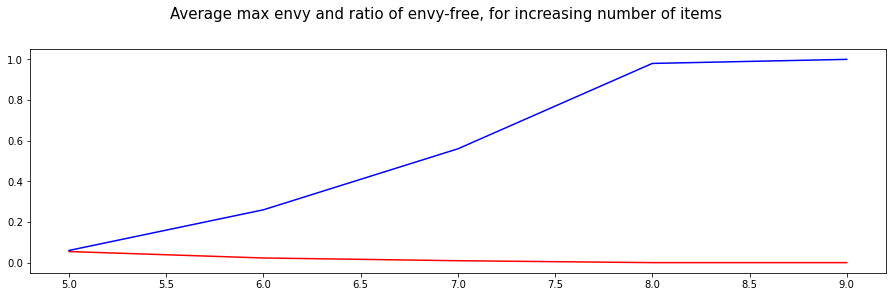

In [55]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
p = np.linspace(tested_resources[0], tested_resources[0]+len(tested_resources)-1,len(tested_resources))
#print(p)
plt.plot(p, max_envy[0], color='red')
plt.plot(p, ratio_ef[0], color = 'blue')
legende = "Average max envy and ratio of envy-free, for increasing number of items"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()

### Question 3
Play a little bit with these simulations and try to determine:
* for 2 agents, how the max envy evolves, from which number of items
you can be reasonably sure to get an envy-free allocation
* same question for 5 agents

## 5. Envy-Freeness on Graph

Agents can only envy their neighbours in the visibility (Idea: you can't envy someone you don't see). 

Augment the code of mipsolving so as to account for graph envy-freeness, ie. an envy is only considered among agents which are neighbours in the graph. Then, test how likely it is to get a graph-envy free allocation:
* on a line of 10 agents, with Borda utilities,
* on a star of 10 agents, with Borda utilities.